# Modelo de Regresión de Poisson con datos simulados

En este cuaderno se crean datos sintéticos con dos variables independientes y una variaboe dependiente ajustados con un modelo de Poisson

Posteriormente se estiman los parámetros del modelo con `statsmodels` y con `sklearn`

Queremos simular unos datos acoplados a un modelo de regresión de Poisson. El modelo de regresión de Poisson tiene una función de activación exponencial y la respuesta del modelo es la media de una distribución de Poisson. Es decir la respuesta del modelo es igual a lambda (la media de una distribución de Poisson) que a su vez es igual a $x_i\beta$

>$y_i=\lambda_i=e^{\beta_0 + \beta_1 x_i+\beta_2 x_i}$

Para crear el dataset:

* Se simula una matriz con dos variables independientes con distribución uniforme en el intervalo [0,1]
* Se añade el vector de unos a la izquierda del dataset

* Se definen las betas

* Se calcula el vector $x\beta$

> >$x\beta=\beta_0 + \beta_1 x_i+\beta_2 x_i$

* Se aplica la función de activación al vector $x\beta$ para calcular la respuesta del modelo

> >$\lambda_i=e^{\beta_0 + \beta_1 x_i+\beta_2 x_i}$


* Recuerda que la función de activación es la inversa de la función de enlace. Si la función de activación es la exponencial, la función de enlace es el logaritmo neperiano

>>  $log(\lambda_i)=\beta_0 + \beta_1 x_i+\beta_2 x_i$

* Una vez se ha obtenido la respuesta del modelo $\lambda_i=e^{x\beta}$, se introduce la aleatoriedad en el modelo para simular las $y_i$. Es decir, la variable dependiente observada $y_i$ es un número aleatorio de una distribución de Poisson con media $\lambda_i$.


In [1]:
# Importar librerías necesarias

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generar el dataset



In [27]:
# Simular datos
# Numero de observaciones
n=10000

# Semilla para reproducir los mismos numeros aleatorios cada vez
np.random.seed(0)

# Generar las variables independientes
x = np.random.uniform(low=1,high=10,size=(n,2))
# Añadir un vector de unos a las variables independientes
x=sm.add_constant(x)

# Definir las betas y calcular la parte lineal del modelo
betas=np.array([2,0.1,0.2])
xb=x@betas

# Calcular la respuesta del modelo mediante la función de activación
lam=np.exp(xb)

# Calcular la variable dependiente
y=np.random.poisson(lam)

# Regresión de Poisson con `statsmodels`

A partir de los datos ficticios generados, (x,y), especificamos y ajustamos un modelo de regresión de poisson

In [28]:
# Especificar el modelo de la familia Poisson
# Esta especificación asume automáticamente la función de enlace log
modelo_1 = sm.GLM(y, x, family=sm.families.Poisson())

# Se puede especificar explicitamente la función de enlace
modelo_2 = sm.GLM(y, x, family=sm.families.Poisson(sm.families.links.log()))


# Ajustar el modelo
resultado_1 = modelo_1.fit()
resultado_2 = modelo_2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Los resultados de la regresión son

In [31]:
# Imprimir los resultados
print(resultado_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32280.
Date:                Sat, 16 Mar 2024   Deviance:                       9899.4
Time:                        11:37:33   Pearson chi2:                 9.83e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9954      0.006    351.607      0.0


La métrica Pseudo-R-square es equivalente a la métrica $R^2$
o coeficiente de determinación en regresión lineal

Se define como

Pseudo-R-square=$D^2=1-\frac{D(y,\hat y)}{D(null)}$

Donde:
*  $D(y,\hat y)$ es la "deviance" del modelo considerando los valores reales y predichos
*  $D(null)$ es la "deviance" considerando un modelo en el que la predicción es constante e igual a la media de las $y$ reales


A su vez, la métrica "deviance" se define como 2 por la diferencia entre la verosimilitud del modelo saturado con el modelo estimado. (El modelo saturado es el modelo con error cero)


Matemáticamente:

$D(y,\hat y)=2(log(p(y|saturado))-log(p(y|estimacion))$

La métrica "deviance" es similar la chi2 o chi cuadrado

En términos muy generales podríamos decir que una chi2 que tiene un valor similar a los grados de libertad del modelo indica que el modelo es bueno

Notas:
* El log del modelo saturado es cero, pero se mantiene el término en la fórmula porque eventualmente se puede calcular la deviance entre dos modelos sin necesidad de que el primero sea un modelo saturado.

* A diferencia del coeficiente de determinación $R^2$, el Pseudo-R-Squ puede ser negativo, ya que lo modelos pueden ser, eventualmente, peores al resultado de predecir la media




# Regresión de Poisson con `sklearn`

In [32]:
# Importar las librerías necesarias
from sklearn.linear_model import PoissonRegressor

In [33]:
# Quitar la columna de unos del dataset
x_new=np.delete(x,0,1)

# Instanciar y ajustar el modelo
mode = PoissonRegressor()
mode.fit(x_new, y)

PoissonRegressor()

In [34]:
# Imprimir los coeficientes del modelo

print(f"Beta0: {mode.intercept_:.2f} \
  \nBeta1: {mode.coef_[0]:.2f} \
  \nBeta2: {mode.coef_[1]:.2f}" )



Beta0: 2.00   
Beta1: 0.10   
Beta2: 0.20


# Regresion de Poisson con ina variable explicativa

Desarrollamos a continuación un ejemplo de regresión de Poisson simple con una única variable explicativa

Todos los conceptos anteriores se utilizan ahora


In [23]:
import numpy as np
from numpy.random import uniform, normal, poisson


# Simular datos
np.random.seed(2)
n = 1000
b0 = 2
b1= 3

x = uniform(1, 5, size=n)
lamb = np.exp(b0+ b1 * x)
y = poisson(lamb)

import statsmodels.api as sm
x = sm.add_constant(x)

# Poisson regression
especificado = sm.GLM(y, x, family=sm.families.Poisson(link=sm.families.links.log()))
ajustado = especificado.fit()
print(ajustado.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6855.3
Date:                Sat, 16 Mar 2024   Deviance:                       1023.8
Time:                        11:33:25   Pearson chi2:                 1.02e+03
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9997      0.000   6101.780      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


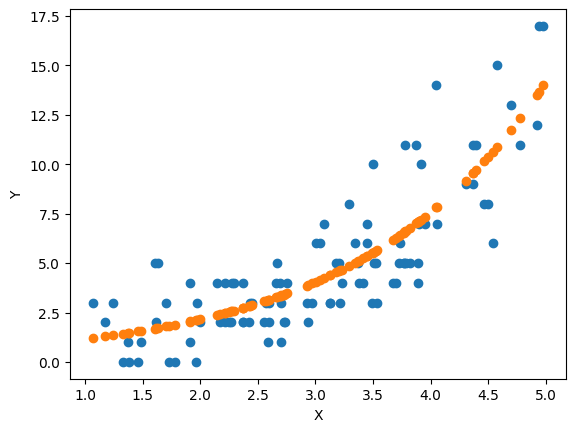

In [ ]:
y_hat = ajustado.predict(x)

import matplotlib.pyplot as plt

plt.scatter(x[:,1], y) # Los puntos del dataset x,y (sin el vector de unos)
plt.scatter(x[:,1], y_hat) # Los puntos x, y_hat de x y la prediccion de x
plt.xlabel("X")
plt.ylabel("Y");